alpha = 0.5605768882638004
beta = 1.1881469530605138
delta = 2.033369181296621
Check if solutions (if zero): (-3.3510971775285725e-12, -6.494804694057166e-13, 1.5654144647214707e-12)
Probability sum check: 1.0


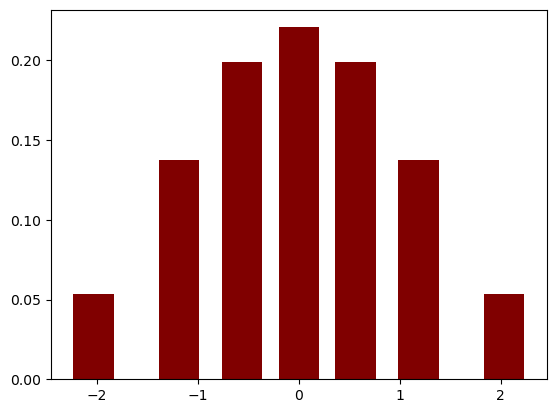

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 14 11:30:00 2023

@author: maria popovic
"""



from numpy import array, exp, append, linspace, log, average
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import erf, pi, sqrt
import random
from scipy.stats import norm

# Solve equations for level 7

def eq_a(a,b):
    return((exp(-(a**2)/8.)-exp(-((a+b)**2)/8.))*pow(2.*pi,-0.5)/(0.5*erf((a+b)/(2*sqrt(2)))-0.5*erf(a/(2.*sqrt(2)))))
    
def eq_b(a,b,d):
    return((exp(-((a+b)**2)/8.)-exp(-((b+d)**2)/8.))*pow(2.*pi,-0.5)/(0.5*erf((b+d)/(2.*sqrt(2)))-0.5*erf((a+b)/(2.*sqrt(2)))))

def eq_d(b,d):
    return(exp(-((b+d)**2)/8.)*pow(2.*pi,-0.5)/(0.5-0.5*erf((b+d)/(2.*sqrt(2)))))


def equations(p):
    a,b,d = p
    return (a-eq_a(a,b),b-eq_b(a,b,d),d-eq_d(b,d))


alpha,beta,delta = fsolve(equations,(-1,1,1))

print('alpha = '+str(alpha))
print('beta = '+str(beta))
print('delta = '+str(delta))


print('Check if solutions (if zero): '+str(equations((alpha, beta, delta))))


def prob_0(a):
    return(erf(a/(2.*sqrt(2))))

def prob_a(a,b):
    return(0.5*erf((a+b)/(2*sqrt(2)))-0.5*erf(a/(2.*sqrt(2))))

def prob_b(a,b,d):
    return(0.5*erf((b+d)/(2.*sqrt(2)))-0.5*erf((a+b)/(2.*sqrt(2))))

def prob_d(b,d):
    return(0.5-0.5*erf((b+d)/(2.*sqrt(2))))
    

opt_quant = array([-delta,-beta,-alpha,0.,alpha,beta,delta])
prob = array([])

    
for index in opt_quant:
    if abs(index)==alpha:
        prob=append(prob,prob_a(alpha,beta))
    if abs(index)==beta:
        prob=append(prob,prob_b(alpha,beta,delta))
    if abs(index)==delta:
        prob=append(prob,prob_d(beta,delta))
    if index == 0.:
        prob=append(prob,prob_0(alpha))
        
plt.bar(opt_quant, prob, color ='maroon', width=0.4)

pmf_check = sum(prob)
print('Probability sum check: '+ str(pmf_check))


In [18]:
### Create linear quantizers in equal length intervals with corresponding probabilities ###

num_bins = len(opt_quant)

# Create knots for linear quantizers from the gamma functions

knots_linear = linspace(opt_quant[0], opt_quant[-1], num = num_bins)

# Fix the two extreme points for the interval in which the cells are located

extreme_cell_bounds = [norm.ppf(0.005), norm.ppf(0.995)]

#Append extreme left bound

cell_bounds_linear = [extreme_cell_bounds[0]]

for index in range(1,len(knots_linear)):
    
    cell_bounds_linear.append((knots_linear[index] + knots_linear[index - 1])/2)

# Append extreme right bound

cell_bounds_linear.append(extreme_cell_bounds[1])

# Define the cumulative distribution function from the right extreme of each cell

cdf_linear_rightbound = norm.cdf(cell_bounds_linear[1:])

# Round last element to = 1

tmp = cdf_linear_rightbound[:-1]
cdf_linear_rightbound = append(tmp,round(cdf_linear_rightbound[-1]))


# Define the cumulative distribution function from the midpoint of each cell

cdf_linear_midpoint = []

for index in range(0,len(knots_linear)):
    midpoint = (cell_bounds_linear[index] + cell_bounds_linear[index + 1])/2
    cdf_linear_midpoint.append(norm.cdf(midpoint))

# Round last element to = 1

tmp = cdf_linear_midpoint[:-1]
cdf_linear_midpoint = append(tmp,round(cdf_linear_midpoint[-1]))

In [19]:
### Create stationary quantizers ###

# The stationary knots are just the gammas that solve the system of equations

knots_stationary = opt_quant

# Append extreme left bound, which is the same as the linear

cell_bounds_stationary = [extreme_cell_bounds[0]]

for index in range(1,len(knots_stationary)):
    
    cell_bounds_stationary.append((knots_stationary[index] + knots_stationary[index - 1])/2)
    
# Append extreme right bound
   
cell_bounds_stationary.append(extreme_cell_bounds[1])
    
# Define the cumulative distribution function from the right extreme of each cell

cdf_stationary_rightbound = norm.cdf(cell_bounds_stationary[1:])

# Round last element to = 1

tmp = cdf_stationary_rightbound[:-1]
cdf_stationary_rightbound = append(tmp,round(cdf_stationary_rightbound[-1]))

# Define the cumulative distribution function from the midpoint of each cell

cdf_stationary_midpoint = []

for index in range(0,len(knots_stationary)):
    midpoint = (cell_bounds_stationary[index] + cell_bounds_stationary[index + 1])/2
    cdf_stationary_midpoint.append(norm.cdf(midpoint))
    
# Round last element to = 1

tmp = cdf_stationary_midpoint[:-1]
cdf_stationary_midpoint= append(tmp,round(cdf_stationary_midpoint[-1]))   

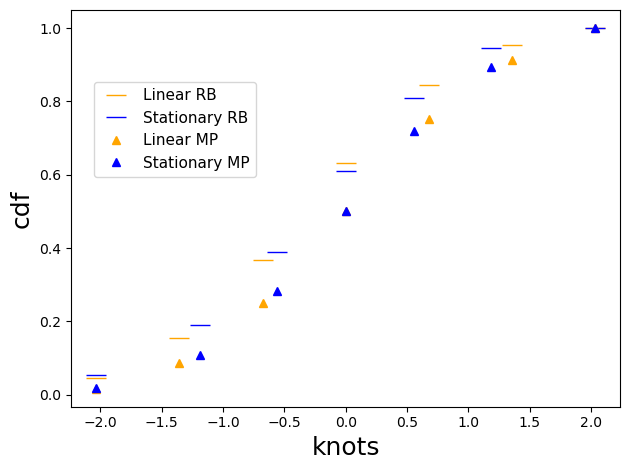

In [20]:
f1 = plt.figure(1)
ax=plt.axes()

ax.plot(knots_linear,cdf_linear_rightbound,marker = "_",label='Linear RB',markersize=15, linewidth = 0, color = 'orange')
ax.plot(knots_stationary,cdf_stationary_rightbound,marker = "_",label='Stationary RB',markersize=15,linewidth=0, color = 'blue')
ax.plot(knots_linear,cdf_linear_midpoint,marker = "^",label='Linear MP',markersize=6, linewidth = 0, color = 'orange')
ax.plot(knots_stationary,cdf_stationary_midpoint,marker = "^",label='Stationary MP',markersize=6, linewidth = 0, color = 'blue')

ax.set_xlabel('knots',fontsize=18)
ax.set_ylabel('cdf',fontsize=18)
plt.tight_layout()
plt.legend(loc='lower right', bbox_to_anchor=(0.35, 0.56),fontsize=11)


plt.show()

In [21]:
### Simulation of the stockprice process ###

int_rate = 0.05
K = 1
sigma = 0.2 
s_0 = 1
T = 0.25
        
def stockprice_process(y,T):

    s_T = s_0*exp((int_rate - 0.5*(sigma**2))*T + sigma*sqrt(T)*y)
        
    return s_T


number_simulations = 2000 # Change to set number of simulations

iterations = 0


# Initialize four types of stockprice simulations
stockprice_linear_rightbound = []
stockprice_linear_midpoint = []
stockprice_stationary_rightbound = []
stockprice_stationary_midpoint = []

while iterations < number_simulations:
    
    u = random.uniform(0,1)

# Finds the CDF to which domain the random number belongs to and assigns the corresponding quantizer/knot
# This code corresponds to the operation y = F^(-1) (u) with u random variable in [0,1], and where F is CDF

    index = 0
    
    while cdf_linear_rightbound[index] < u:
        index = index + 1
        
    y_linear_rightbound = knots_linear[index]

        
    index = 0
    
    while cdf_linear_midpoint[index] < u:
        index = index + 1
        
    y_linear_midpoint = knots_linear[index]

  
    index = 0
    
    while cdf_stationary_rightbound[index] < u:
        index = index + 1

    y_stationary_rightbound = knots_stationary[index]


    index = 0
    
    while cdf_stationary_midpoint[index] < u:
        index = index + 1 

    y_stationary_midpoint = knots_stationary[index]
     
    # Append (S_t - K)^+ = max(S_t, 0)
    
    stockprice_linear_rightbound.append(max(stockprice_process(y_linear_rightbound,T) - K,0))
    stockprice_linear_midpoint.append(max(stockprice_process(y_linear_midpoint,T) - K,0))
    stockprice_stationary_rightbound.append(max(stockprice_process(y_stationary_rightbound,T) - K,0))
    stockprice_stationary_midpoint.append(max(stockprice_process(y_stationary_midpoint,T) - K,0))
    
    iterations = iterations + 1


stock_mean_linear_RB = round(average(stockprice_linear_rightbound),5)
stock_mean_linear_MP = round(average(stockprice_linear_midpoint),5)
stock_mean_stationary_RB = round(average(stockprice_stationary_rightbound),5)
stock_mean_stationary_MP = round(average(stockprice_stationary_midpoint),5)


print("Black-Scholes price: 0.04615")
print("Linear quantizers (with right bound CDF), iterations = " + str(number_simulations) + ": " + str(stock_mean_linear_RB))
print("Stationary quantizers (with right bound CDF), iterations = " + str(number_simulations) + ": " + str(stock_mean_stationary_RB))
print("Linear quantizers (with mid-point CDF), iterations = " + str(number_simulations) + ": " + str(stock_mean_linear_MP)) 
print("Stationary quantizers (with mid-point CDF), iterations = " + str(number_simulations) + ": " + str(stock_mean_stationary_MP))


Black-Scholes price: 0.04615
Linear quantizers (with right bound CDF), iterations = 2000: 0.04688
Stationary quantizers (with right bound CDF), iterations = 2000: 0.04678
Linear quantizers (with mid-point CDF), iterations = 2000: 0.06749
Stationary quantizers (with mid-point CDF), iterations = 2000: 0.06517
